# Model

> Fill in a module description here

In [ ]:
# | default_exp model

In [ ]:
# | hide
from nbdev.showdoc import *

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| export
from typing import Optional, Tuple, Dict

from torch import nn
import torch.nn.functional as F

from torchtyping import TensorType
from einops import rearrange

/Users/education/DATA/projects/neuroscience/neuraltext/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#| export
def get_vocab() -> Dict[str, int]:
    chars = ['a','b','c','d','e','f','g','h','i','j',
             'k','l','m','n','o','p','q','r','s','t',
             'u','v','w','x','y','z', '>',',',"'",'~','?'
    ]
    return {c: i for i, c in enumerate(chars)}

### RNN - The Decoder

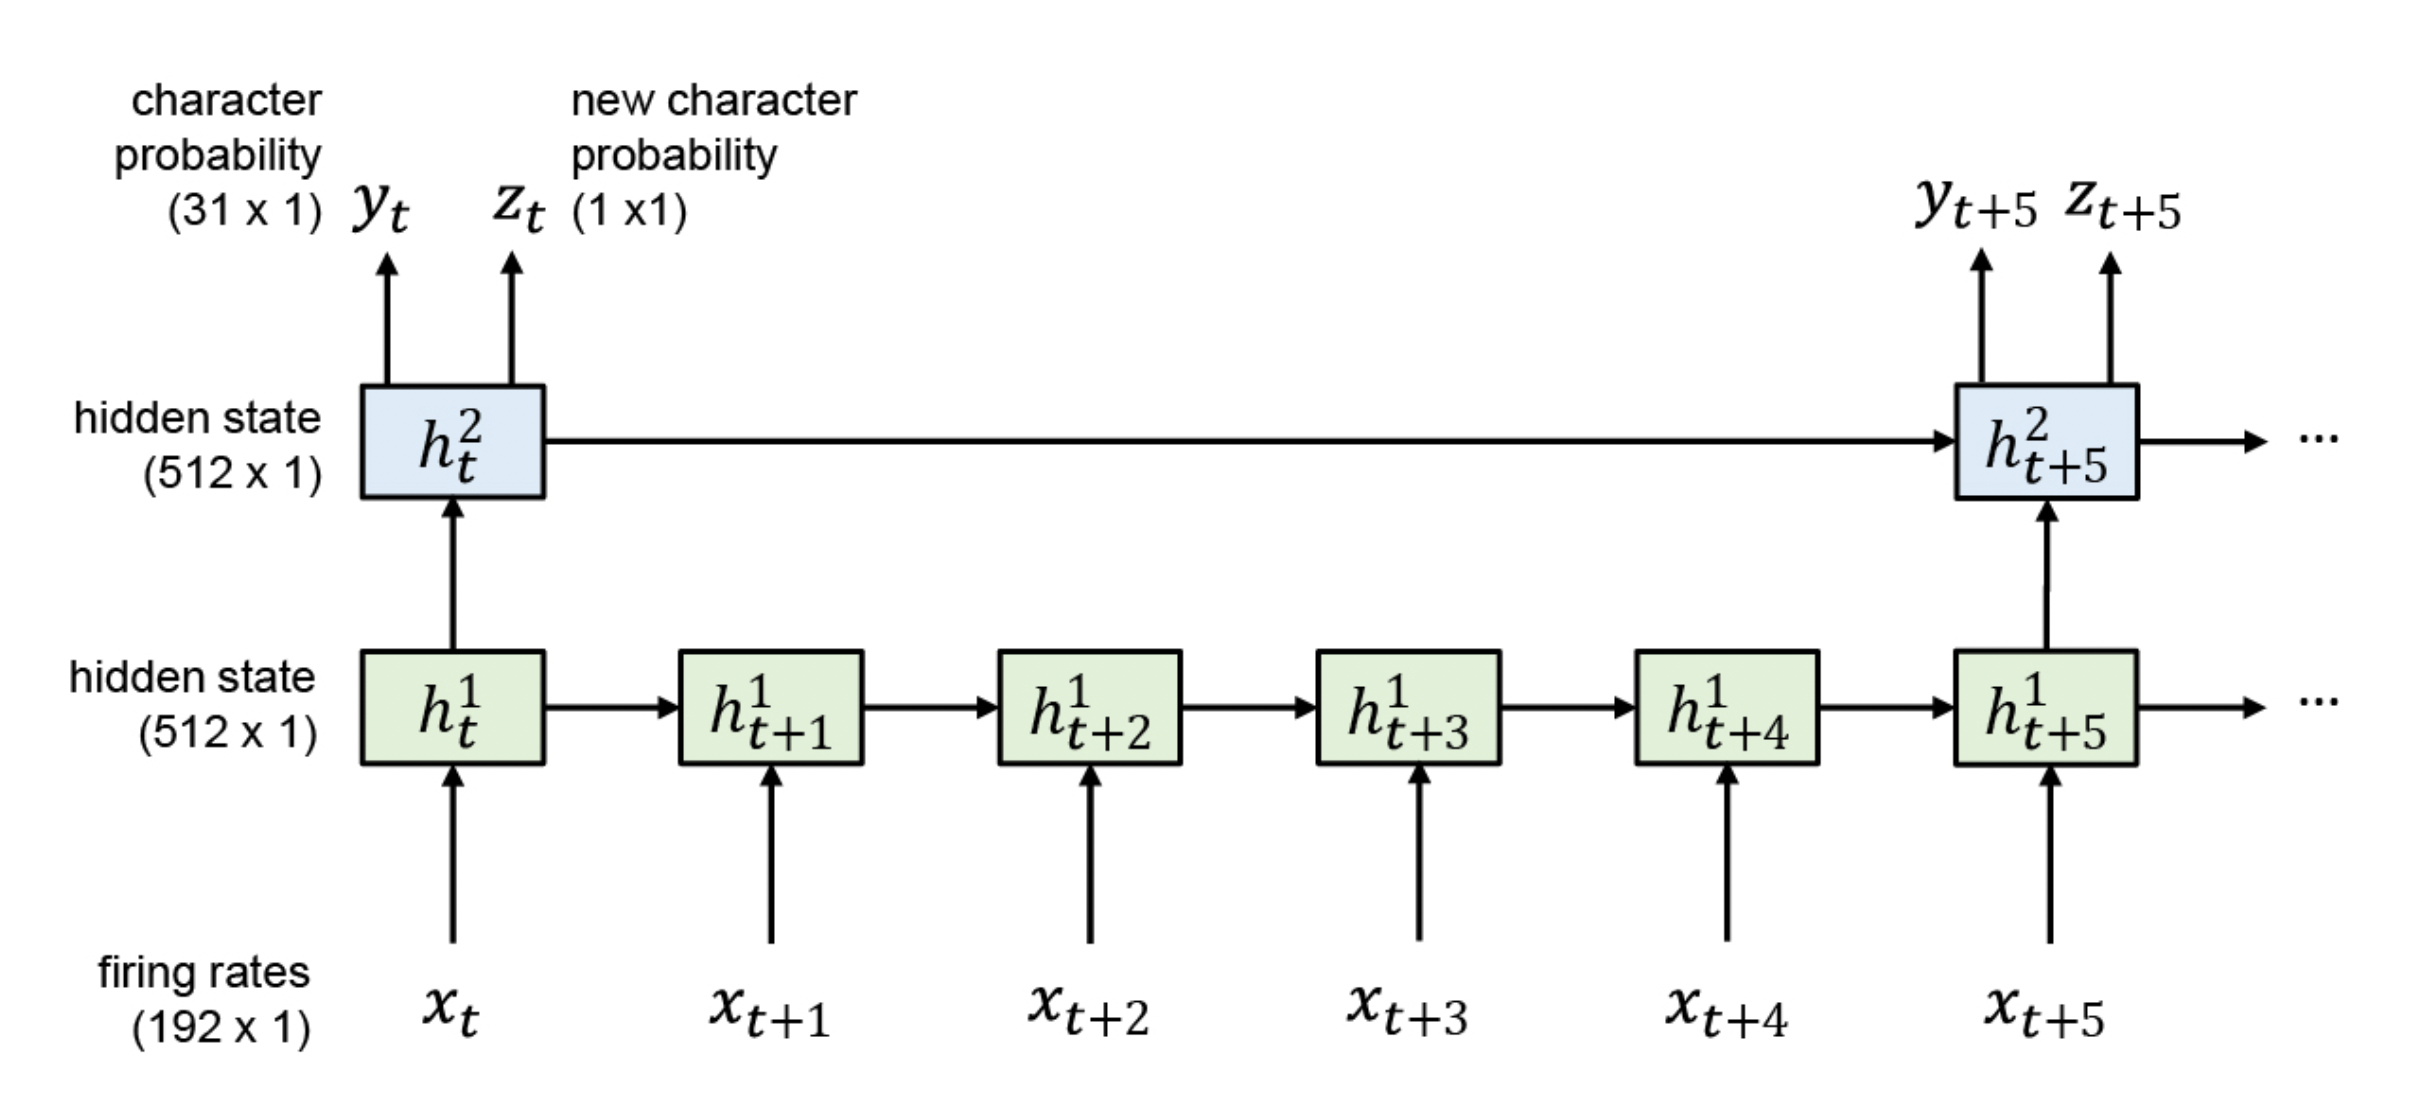

In [ ]:

#| export
class RNN(nn.Module):
    """The Decoder Neural Signal."""
    def __init__(
        self,
        input_size: int = 192, # The firing rate
        hidden_size: int = 512,
        output_size: int = 31, # The number of vocabs
    ):
        super().__init__()
        self.gru1 = nn.GRU(input_size, hidden_size)
        self.gru2 = nn.GRU(hidden_size, output_size)
        self.z_layer = nn.Linear(hidden_size, 1)
    
    def get_prob_next_character(
        self, x: TensorType["batch_size", "hidden_size"]
    ) -> TensorType[1]: # The probability that there will be a next character
        return F.sigmoid(self.z_layer(x))

    def forward(
        self,
        x: TensorType["batch_size", "n_vocabs"],
        hidden: Optional[TensorType["batch_size", "hidden_size"]] = None
    ) -> Tuple[
        TensorType["batch_size", "n_vocabs"],
        TensorType["batch_size", "hidden_size"],
        TensorType[1]
    ]:
        """The forward pass."""
        gru1_out, hidden = self.gru1(x, hidden)
        gru2_out = self.gru2(gru1_out)[0]
        z_t = self.get_prob_next_character(hidden)
        z_t = rearrange(z_t, '1 b -> b')
        return gru2_out, hidden, z_t

In [ ]:
show_doc(RNN.get_prob_next_character)

---

[source](https://github.com/xrsrke/neuraltext/blob/main/neuraltext/model.py#L38){target="_blank" style="float:right; font-size:smaller"}

### RNN.get_prob_next_character

>      RNN.get_prob_next_character (x:typing.Annotated[torch.Tensor,{'__torchtyp
>                                   ing__':True,'details':('batch_size','hidden_
>                                   size',),'cls_name':'TensorType'}])

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| x | Annotated |  |
| **Returns** | **Annotated** | **The probability that there will be a next character** |

In [ ]:
show_doc(RNN.forward)

---

[source](https://github.com/xrsrke/neuraltext/blob/main/neuraltext/model.py#L43){target="_blank" style="float:right; font-size:smaller"}

### RNN.forward

>      RNN.forward (x:typing.Annotated[torch.Tensor,{'__torchtyping__':True,'det
>                   ails':('batch_size','n_vocabs',),'cls_name':'TensorType'}], 
>                   hidden:Optional[Annotated[torch.Tensor,{'__torchtyping__':Tr
>                   ue,'details':('batch_size','hidden_size',),'cls_name':'Tenso
>                   rType'}]]=None)

The forward pass.